# Professor Bear :: Image Analysis :: Color Models

## Professor Bear github


Code for Professor Bear YouTube videos at https://github.com/nikbearbrown


## Download Anaconda 4 for Python 2.7

Download Anaconda 4 for  Python 2.7 version
[https://www.continuum.io/downloads](https://www.continuum.io/downloads)
    
Anaconda 4.3.0 includes an easy installation of Python (2.7.13, 3.4.5, 3.5.2, and/or 3.6.0) and updates of over 100 pre-built and tested scientific and analytic Python packages. These packages include NumPy, Pandas, SciPy, Matplotlib, and Jupyter. Over 620 more packages are available.    
[https://docs.continuum.io/anaconda/pkg-docs](https://docs.continuum.io/anaconda/pkg-docs)
        

## iPython

Go to the directory that has your iPython notebook

At the command line type

_jupyter notebook notebookname_

_ipython notebook notebookname_  will also work

For example,

jupyter notebook Professor_Bear_Image_Analysis_Loading_Histograms.ipynb



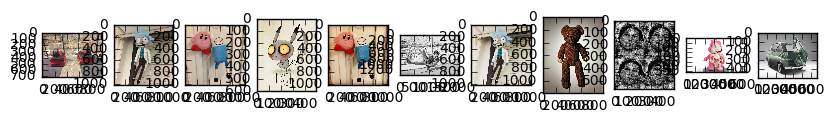

In [1]:
# Bring in python image analysis libraries
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from skimage import color
import skimage.filters as filters
from skimage.transform import hough_circle
from skimage.feature import peak_local_max
from skimage import feature
from skimage import morphology
from skimage.draw import circle_perimeter
from skimage import img_as_float, img_as_ubyte
from skimage import segmentation as seg
from skimage.morphology import watershed
from scipy import ndimage as nd
from scipy.ndimage import convolve
from skimage import feature
import glob # for bulk file import

# Set defaults
plt.rcParams['image.cmap'] = 'gray' # Display grayscale images.
plt.rcParams['image.interpolation'] = 'none' # Use nearest-neighbour
plt.rcParams['figure.figsize'] = 10, 10

# Import test images
imgpaths = glob.glob("./images/*.jpg") + glob.glob("./images/*.png")
# imgpaths = glob.glob("images/*.jpg") + glob.glob("images/*.png")  Windows
# Windows has different relative paths than Mac/Unix
imgset = [mpimg.imread(x) for x in imgpaths]

# Display thumbnails of the images to ensure loading
plt.figure()
for i,img in enumerate(imgset):
    plt.subplot(1, len(imgset), i+1)
    plt.imshow(img, cmap = 'gray')

## Color Models

A [color model](https://en.wikipedia.org/wiki/Color_model) is an abstract mathematical model describing the way colors can be represented as tuples of numbers, typically as three or four values or color components. The values are often called 'bands'. For example, the [RGB color model](https://en.wikipedia.org/wiki/RGB_color_model) has three bands,  red, green and blue.

## RGB color model

The [RGB color model](https://en.wikipedia.org/wiki/RGB_color_model) has three colors,  red, green and blue. Colors are formed by additive color mixing: adding red to green yields yellow; adding red to blue yields magenta; adding green to blue yields cyan; adding all three primary colors together yields white.

In [2]:
# Show rgb as four plots
def plot_rgb_components(img):
    if img.ndim == 2: # convert grayscale to rgb
        rgb = color.gray2rgb(img)
    elif img.ndim == 3:
        rgb = img
    else: # Not an image
        print("Must pass a valid RGB or grayscale image")
    plt.subplot(1, 4, 1)
    plt.title('Original')
    plt.imshow(rgb, cmap = 'gray') # Original
    plt.subplot(1, 4, 2)    
    plt.title('Red')
    plt.imshow(rgb[:,:,0], cmap='gray') # Red
    plt.subplot(1, 4, 3)
    plt.title('Green')
    plt.imshow(rgb[:,:,1], cmap='gray') # Green
    plt.subplot(1, 4, 4)
    plt.title('Blue')
    plt.imshow(rgb[:,:,2], cmap='gray') # Blue

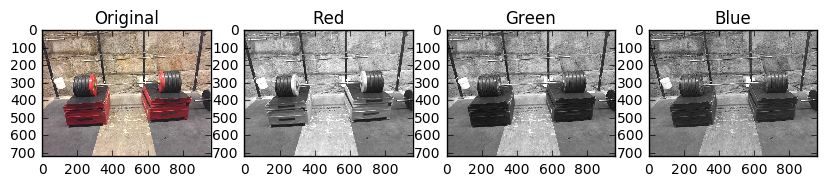

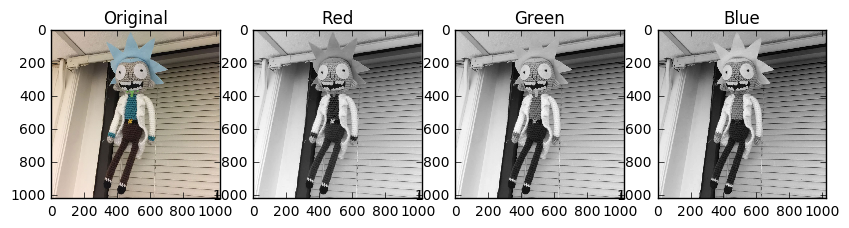

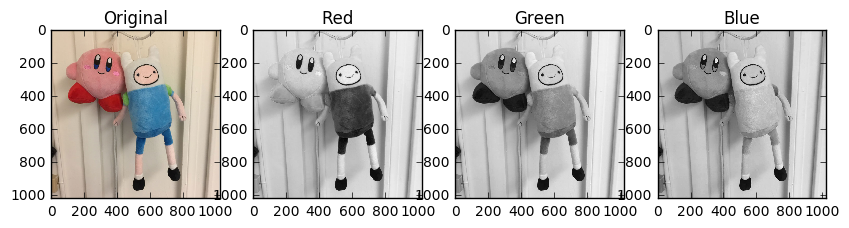

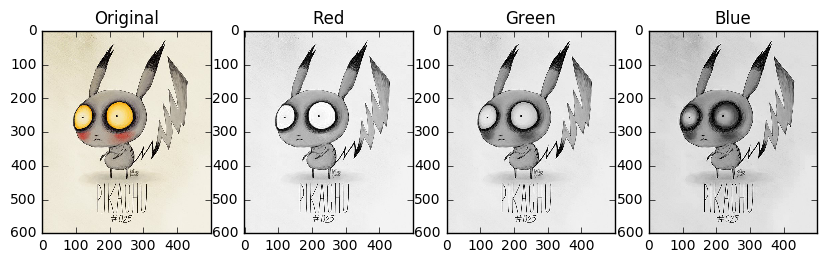

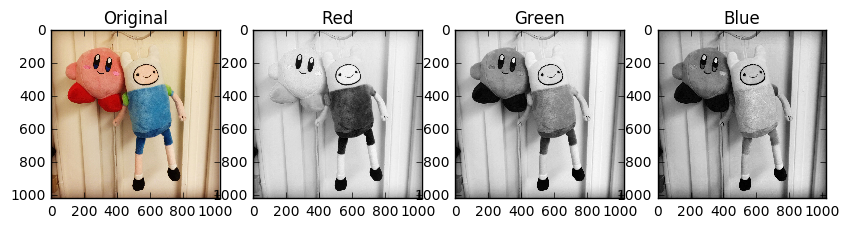

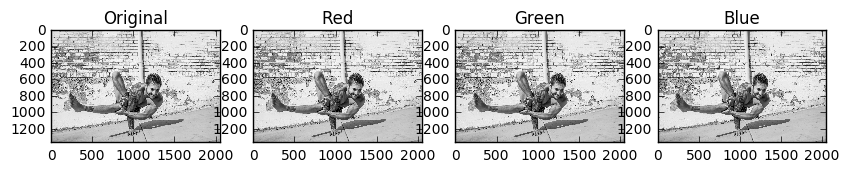

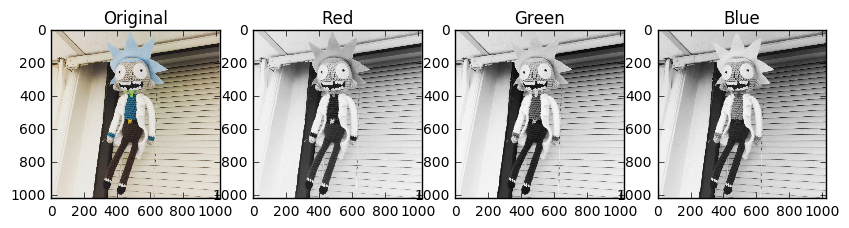

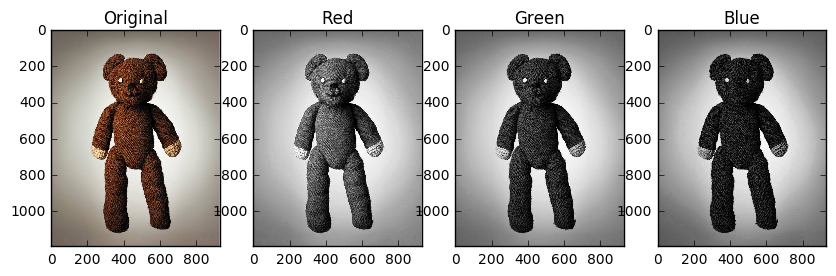

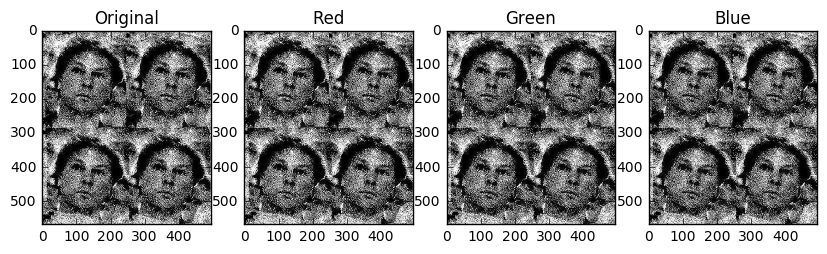

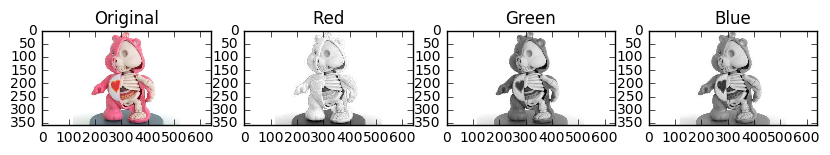

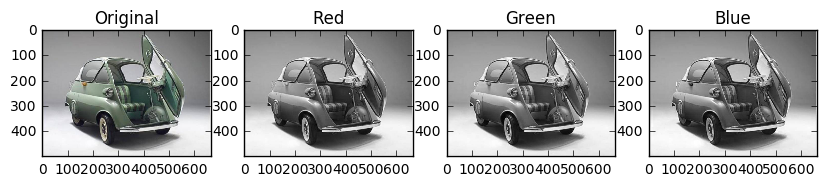

In [3]:
# Apply to image set
for i,img in enumerate(imgset):
    plt.figure()
    plot_rgb_components(img)

## HSV color model

RBG color is not generated in the way painters mix colors. In an attempt to accommodate more traditional and intuitive color mixing models,  The [HSV color model](https://en.wikipedia.org/wiki/HSL_and_HSV) is a common cylindrical-coordinate representations of points in an RGB color model. HSV stands for hue, saturation, and value, and is also often called HSB (B for brightness).

Hue

[Hue](https://en.wikipedia.org/wiki/Hue) is defined technically, as "the degree to which a stimulus can be described as similar to or different from stimuli that are described as red, green, blue, and yellow.

Usually, colors with the same hue are distinguished with adjectives referring to their lightness and/or colorfulness, such as with "light blue", "pastel blue", "vivid blue". 

Saturation

[Saturation](https://en.wikipedia.org/wiki/Colorfulness) is is defined as the "colorfulness of a stimulus relative to its own brightness". That is, the perceived intensity of a specific color.

Value

Value is defined as the relative lightness or darkness of a color.


In [4]:
# Show HSV as four plots
def plot_hsv_components(img):
    if img.ndim == 2: # convert grayscale to rgb
        hsv = color.rgb2hsv(color.gray2rgb(img))
    elif img.ndim == 3:
        hsv = color.rgb2hsv(img)
    else: # Not an image
        print("Must pass a valid RGB or grayscale image")
    plt.subplot(1, 4, 1)
    plt.title('Original')
    plt.imshow(img, cmap = 'gray') # Original
    plt.subplot(1, 4, 2)    
    plt.title('Hue')
    plt.imshow(hsv[:,:,0], cmap='hsv') # Hue
    plt.subplot(1, 4, 3)
    plt.title('Saturation')
    plt.imshow(hsv[:,:,1], cmap='Greens') # Saturation
    plt.subplot(1, 4, 4)
    plt.title('Value')
    plt.imshow(hsv[:,:,2], cmap='gray') # Value

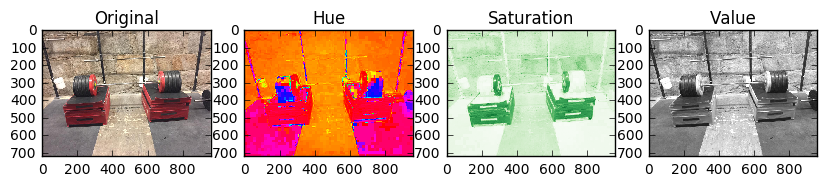

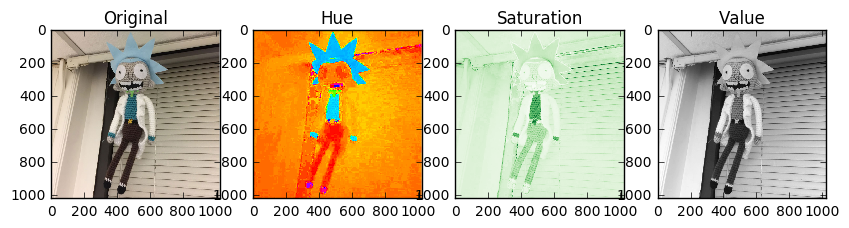

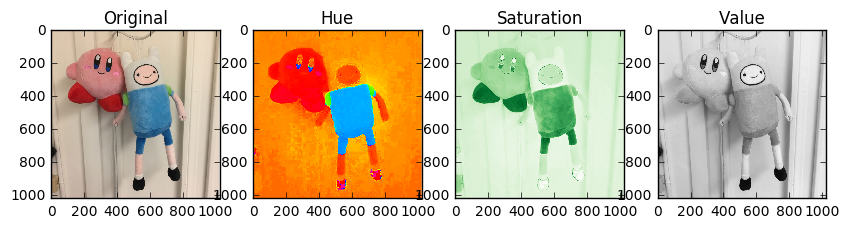

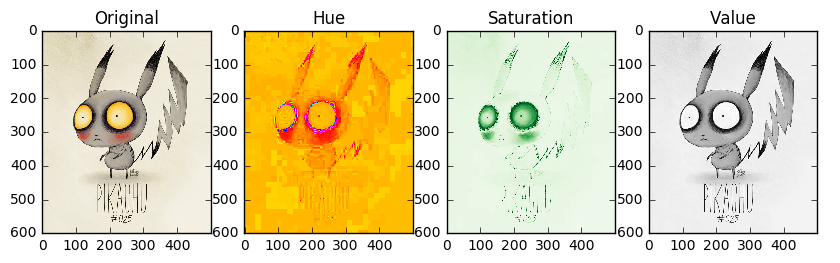

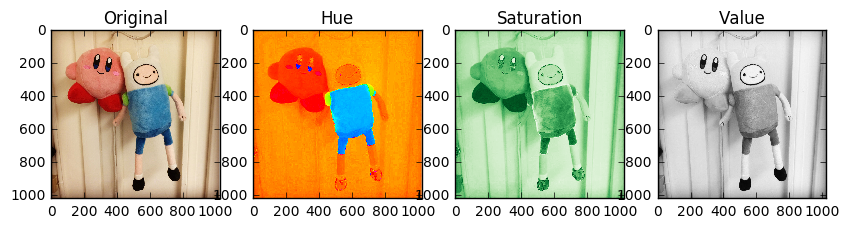

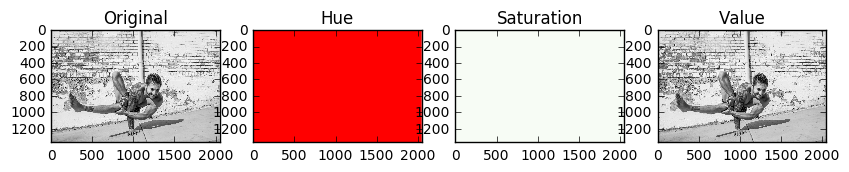

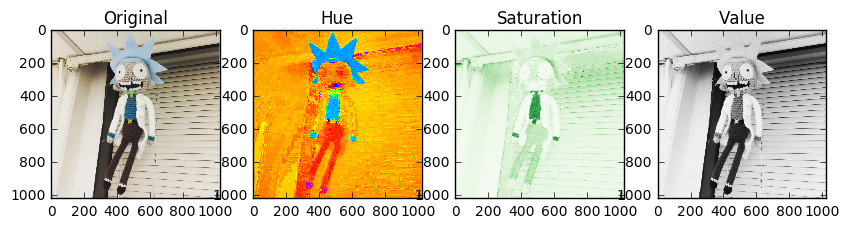

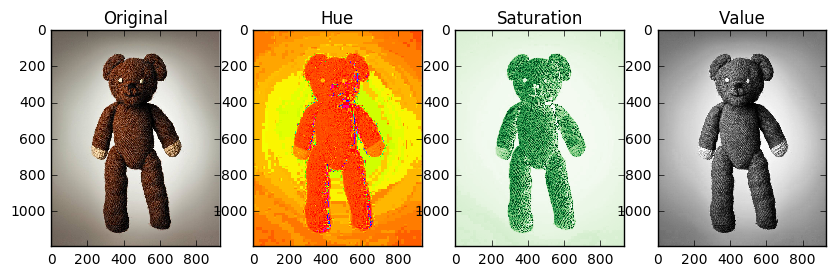

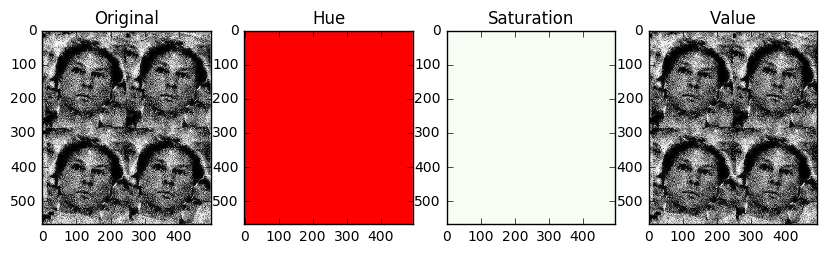

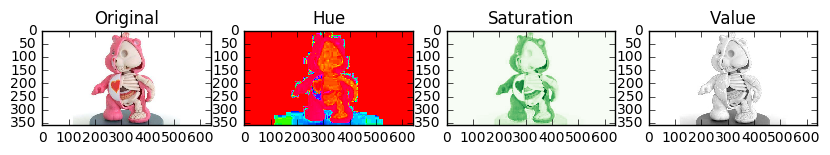

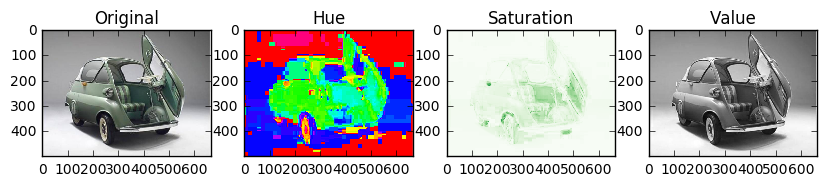

In [5]:
# Apply to image set
for i,img in enumerate(imgset):
    plt.figure()
    plot_hsv_components(img)

### Evaluation - Transform each of your images to the CIELAB color space. Plot the l, a, b components to get a feel for what they do. Look at the Wikipedia article on the CIELAB color space. What do they do?

In [6]:
# Show lab as four plots
def plot_lab_components(img):
    if img.ndim == 2: # convert grayscale to Lab
        lab = color.rgb2lab(color.gray2rgb(img))
    elif img.ndim == 3:
        lab = color.rgb2lab(img)
    else: # Not an image
        print("Must pass a valid RGB or grayscale image")
    plt.subplot(1, 4, 1)
    plt.title('Original')
    plt.imshow(img, cmap = 'gray') # Original        
    plt.subplot(1, 4, 2)
    plt.title('l')
    plt.imshow(lab[:,:,0]) # L
    plt.subplot(1, 4, 3)
    plt.title('a')
    plt.imshow(lab[:,:,1]) # a
    plt.subplot(1, 4, 4)
    plt.title('b')
    plt.imshow(lab[:,:,2]) # b

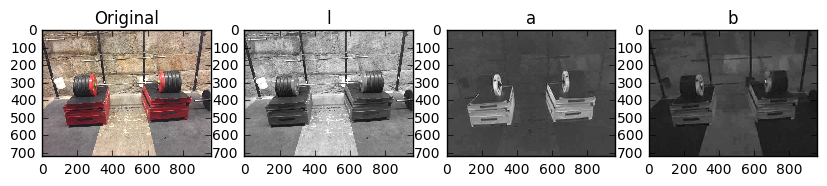

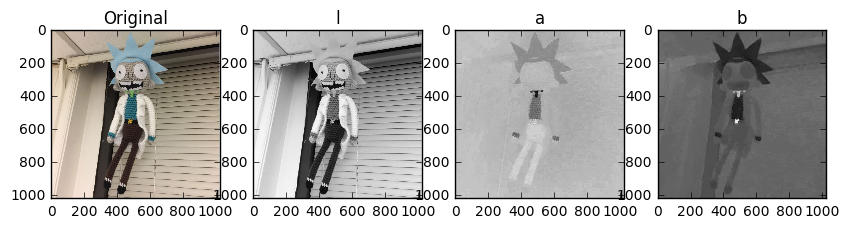

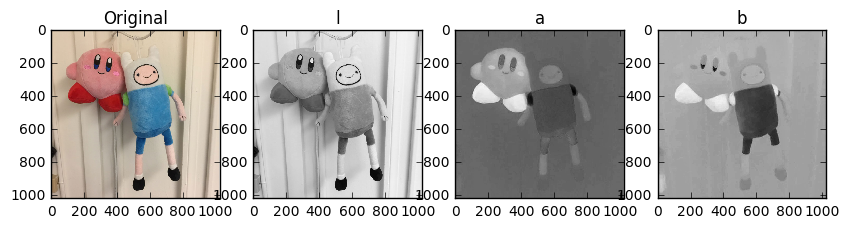

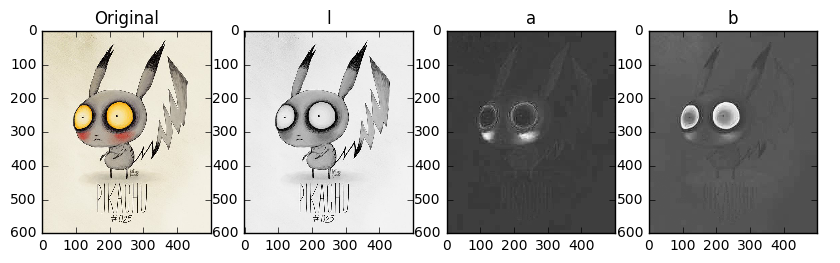

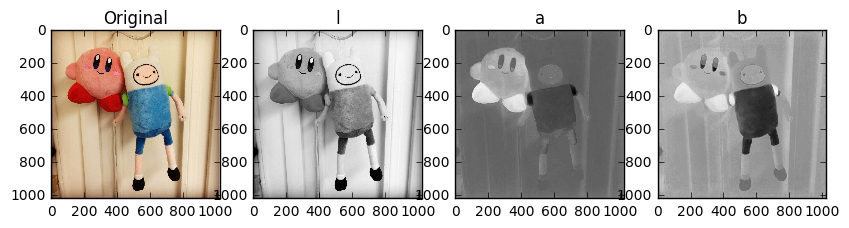

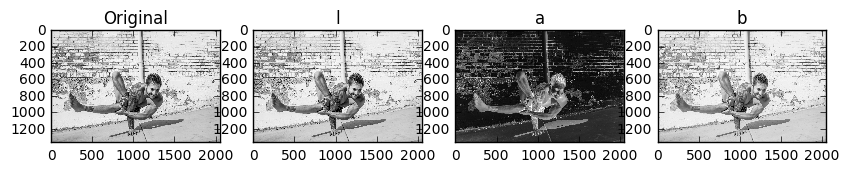

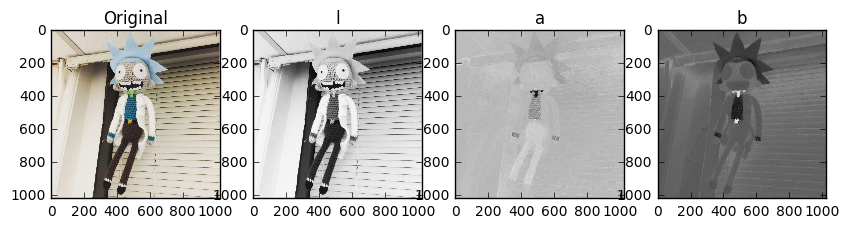

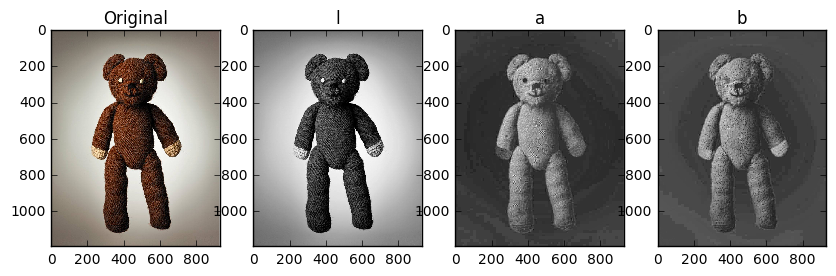

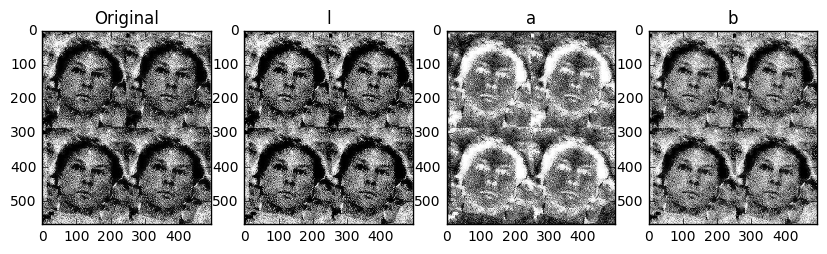

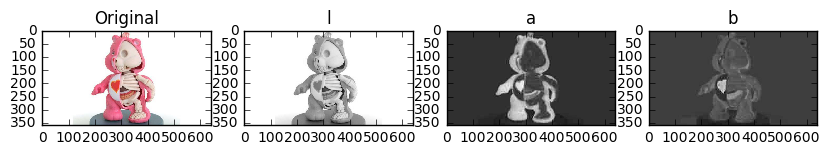

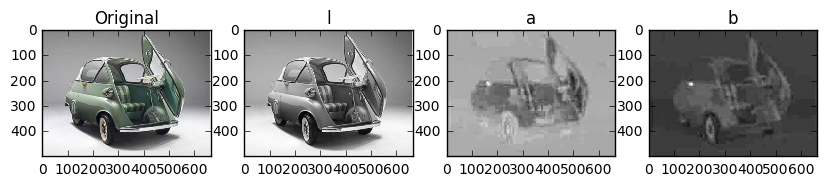

In [7]:
# Apply to image set
for i,img in enumerate(imgset):
    plt.figure()
    plot_lab_components(img)

The [Lab color space](https://en.wikipedia.org/wiki/Lab_color_space) is a color-opponent space with dimensions L for lightness and a and b for the color-opponent dimensions, based on nonlinearly compressed (e.g. CIE XYZ) coordinates. Lab color is designed to approximate human vision.  It can be used to make accurate color balance corrections by modifying output curves in the a and b components, or to adjust the lightness contrast using the L component.

# Python Tutorials

Python 101 [Beginning Python http://www.rexx.com/~dkuhlman/python_101/python_101.html](Beginning Python http://www.rexx.com/~dkuhlman/python_101/python_101.html)

The Official Python Tutorial - [http://www.python.org/doc/current/tut/tut.html](http://www.python.org/doc/current/tut/tut.html() 

The Python Quick Reference -[http://rgruet.free.fr/PQR2.3.html](http://rgruet.free.fr/PQR2.3.html) 

YouTube Python Tutorials 

Google Python Class - [http://www.youtube.com/watch?v=tKTZoB2Vjuk](http://www.youtube.com/watch?v=tKTZoB2Vjuk) 
                                                                              
Python Fundamentals Training – Classes [http://www.youtube.com/watch?v=rKzZEtxIX14](http://www.youtube.com/watch?v=rKzZEtxIX14)

Python 2.7 Tutorial Derek Banas - [http://www.youtube.com/watch?v=UQi-L-_chcc](http://www.youtube.com/watch?v=UQi-L-_chcc)

Python Programming Tutorial thenewboston - [http://www.youtube.com/watch?v=4Mf0h3HphEA](http://www.youtube.com/watch?v=4Mf0h3HphEA)





